In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


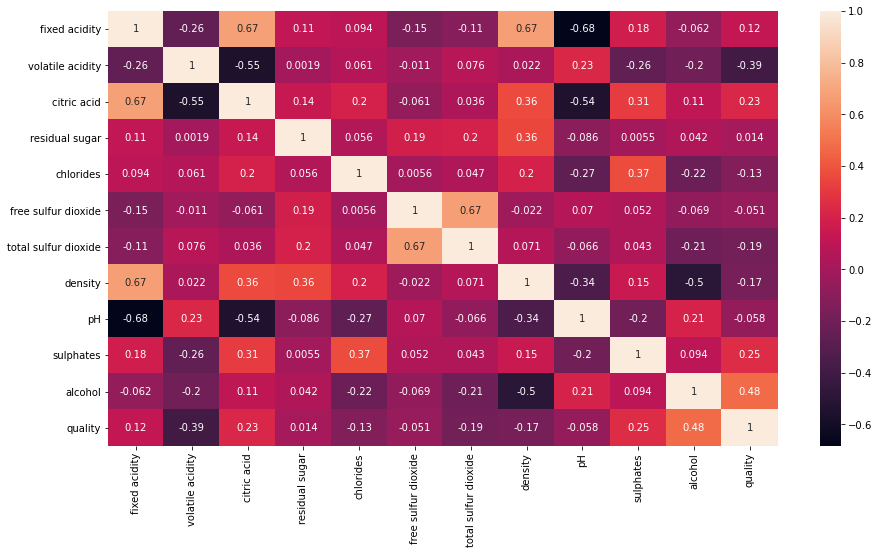

In [8]:
cor = df.corr()

plt.figure(figsize = (15, 8))
sns.heatmap(cor, annot=True)

In [9]:
c = cor.abs()

s = c.unstack()
so = s.sort_values(kind='quicksirt', ascending = False)
so = pd.DataFrame(so, columns = ['Pearson Correlation'])

In [10]:
so[(so['Pearson Correlation'] > 0.5) & (so['Pearson Correlation'] < 1)]

Pearson Correlation
fixed acidity        pH                               0.682978
pH                   fixed acidity                    0.682978
citric acid          fixed acidity                    0.671703
fixed acidity        citric acid                      0.671703
                     density                          0.668047
density              fixed acidity                    0.668047
free sulfur dioxide  total sulfur dioxide             0.667666
total sulfur dioxide free sulfur dioxide              0.667666
volatile acidity     citric acid                      0.552496
citric acid          volatile acidity                 0.552496
                     pH                               0.541904
pH                   citric acid                      0.541904

In [11]:
df1 = df[['alcohol', 'quality', 'sulphates', 'volatile acidity', 'fixed acidity', 'pH', 'total sulfur dioxide', 'residual sugar', 'chlorides']].copy()

In [12]:
df1.shape

(1599, 9)

In [13]:
df1.head()

,alcohol,quality,sulphates,volatile acidity,fixed acidity,pH,total sulfur dioxide,residual sugar,chlorides
0,9.4,5,0.56,0.70,7.4,3.51,34.0,1.9,0.076
1,9.8,5,0.68,0.88,7.8,3.20,67.0,2.6,0.098
2,9.8,5,0.65,0.76,7.8,3.26,54.0,2.3,0.092
3,9.8,6,0.58,0.28,11.2,3.16,60.0,1.9,0.075
4,9.4,5,0.56,0.70,7.4,3.51,34.0,1.9,0.076


In [14]:
df1.describe()

,alcohol,quality,sulphates,volatile acidity,fixed acidity,pH,total sulfur dioxide,residual sugar,chlorides
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,10.422983,5.636023,0.658149,0.527821,8.319637,3.311113,46.467792,2.538806,0.087467
std,1.065668,0.807569,0.169507,0.179060,1.741096,0.154386,32.895324,1.409928,0.047065
min,8.400000,3.000000,0.330000,0.120000,4.600000,2.740000,6.000000,0.900000,0.012000
25%,9.500000,5.000000,0.550000,0.390000,7.100000,3.210000,22.000000,1.900000,0.070000
50%,10.200000,6.000000,0.620000,0.520000,7.900000,3.310000,38.000000,2.200000,0.079000
75%,11.100000,6.000000,0.730000,0.640000,9.200000,3.400000,62.000000,2.600000,0.090000
max,14.900000,8.000000,2.000000,1.580000,15.900000,4.010000,289.000000,15.500000,0.611000


In [15]:
whisker_total_sulfur_dioxide = 62.000000 + 1.5*(62.000000 - 22.000000)
whisker_chlorides = 0.090000 + 1.5*(0.090000 - 0.070000)
print(whisker_total_sulfur_dioxide)
print(whisker_chlorides)

122.0
0.11999999999999998


In [16]:
# df1.loc[(df1['total sulfur dioxide'] > 62.000000), 'total sulfur dioxide'] = 122.0
# df1.loc[(df1['chlorides'] > 0.090000), 'chlorides'] = 0.11999999999999998

In [17]:
df1.describe()

,alcohol,quality,sulphates,volatile acidity,fixed acidity,pH,total sulfur dioxide,residual sugar,chlorides
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,10.422983,5.636023,0.658149,0.527821,8.319637,3.311113,46.467792,2.538806,0.087467
std,1.065668,0.807569,0.169507,0.179060,1.741096,0.154386,32.895324,1.409928,0.047065
min,8.400000,3.000000,0.330000,0.120000,4.600000,2.740000,6.000000,0.900000,0.012000
25%,9.500000,5.000000,0.550000,0.390000,7.100000,3.210000,22.000000,1.900000,0.070000
50%,10.200000,6.000000,0.620000,0.520000,7.900000,3.310000,38.000000,2.200000,0.079000
75%,11.100000,6.000000,0.730000,0.640000,9.200000,3.400000,62.000000,2.600000,0.090000
max,14.900000,8.000000,2.000000,1.580000,15.900000,4.010000,289.000000,15.500000,0.611000


In [18]:
Y = np.array(df1['quality'])

In [19]:
df1.drop(['quality'], axis=1, inplace=True)
df1.head()

,alcohol,sulphates,volatile acidity,fixed acidity,pH,total sulfur dioxide,residual sugar,chlorides
0,9.4,0.56,0.70,7.4,3.51,34.0,1.9,0.076
1,9.8,0.68,0.88,7.8,3.20,67.0,2.6,0.098
2,9.8,0.65,0.76,7.8,3.26,54.0,2.3,0.092
3,9.8,0.58,0.28,11.2,3.16,60.0,1.9,0.075
4,9.4,0.56,0.70,7.4,3.51,34.0,1.9,0.076


In [20]:
X = np.array(df1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state = 45)

In [23]:
from sklearn.linear_model import LinearRegression
alg = LinearRegression()

# from sklearn.tree import DecisionTreeRegressor as DTR
# alg = DTR(max_depth = 6, random_state = 42)

In [24]:
alg.fit(X_train, Y_train)

LinearRegression()

In [25]:
Y_pred = alg.predict(X_test)

In [26]:
# Y_pred

In [27]:
# def reduce(Y_pred):
#     for i in range(len(Y_pred)):
#         if Y_pred[i] <= Y_pred + 0.8:
#             Y_pred[i] = floor(Y_pred)
#         else:
#             Y_pred[i] = ceil(Y_pred)


In [28]:
# To get integer value for predictions

# Y_pred = np.round(Y_pred, 0)    
# Y_pred = Y_pred.astype(np.int)

In [29]:
# Y_pred

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(Y_test, Y_pred)

0.38732052473280876

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(Y_test, Y_pred)

0.40318113219645013